In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

# Read the wine dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/winequality-red.csv")

In [2]:
# Storing the desired quality values in the numpy array y
y = df.quality.values

#We take only two measurements - Quality <=5 or >5
# Convert each entry of y <= 5 to -1 and otherwise 1
y = np.where(y <= 5, -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["alcohol", "pH"]].values

Next is a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method.

In [3]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Next we can instantiate an instance of the Perceptron class and also train this instance over 1000 epochs by running the following code in the cell below.

In [4]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

After training has finished we can call the Perceptron class predict method to view its current predictions given input features. We can quickly view these predictions on the entries in X by running the following code in the cell below.

In [5]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True ...  True  True  True]


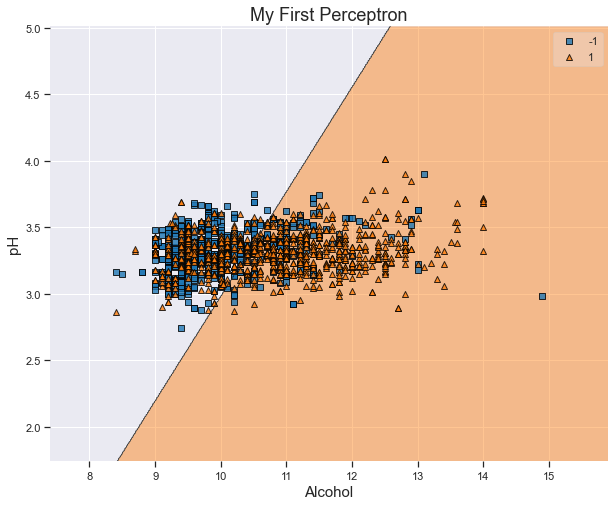

In [7]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("pH", fontsize = 15)
plt.show()

As we can see from the above graph, the data is not completely linearly separable. However, we can see that wines with poor quality (<=5) lie mostly on the left side of the line while that of higher quality (6 and above), lie on both sides. So, if the wine falls on the right side of the line, then the wine is more likely to be of good quality, but if it os on the left side of the line, it could be either good or poor quality.

Next, we view the errors over each epoch through the code below.

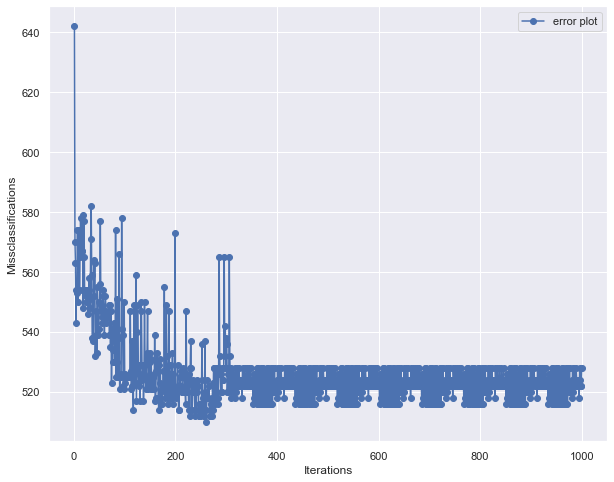

In [8]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

Conclusion: The dataset Wine Quality isn't exactly linearly separable, but we can say that if a wine lies on the right side of the line, then it is more likely to be a good wine.